In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import requests
import scipy

from datetime import date, datetime

## Dataset Representation
### CSMODELT3AY2021
In this section of the notebook, you must fulfill the following:
- State a brief description of the dataset.
- Provide  a  description  of  the  collection  process  executed  to  build  the  dataset. Discuss  the  implications  of  the  data  collection  method  on  the  generated conclusions and insights. Note that you may need to look at the relevant sources related to the dataset to be able to provide the necessary information for this part of the project.
- Describe the structure of the dataset file. In the dataset file, what does each row and  column  represent?  How many observations  are  there  in  the  dataset? How many variables are there in the dataset? If thedataset is composed of different files  that  you  will  combine  in  the  succeeding  steps,  you  need  to  describe  the structure and the contents of each file.
- Discuss the variables in each dataset file. What does each variable represent? In this section, all variables, even those which are not used for the study, should be described to the reader. The purpose of each variable in the dataset should be clear to the reader of the notebook without having to go through an external link.

### Brief Description of the Dataset
The dataset contains 30 years (1990-2020) worth of data collected by the World Food Programme (WFP) from 99 different countries which contains the Global Commodity Prices. The data includes information on country, city, market, price of good in local currency, quantity of good, and month and year recorded.

### Collection Process
** insert here **

Source: https://www.kaggle.com/salehahmedrony/global-food-prices

In [3]:
df = pd.read_csv('wfp_commodity_prices_database.csv', low_memory=False)

In [4]:
df.head()

,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,1,2014,50.0,NaN
1,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,2,2014,50.0,NaN
2,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,3,2014,50.0,NaN
3,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,4,2014,50.0,NaN
4,1.0,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread - Retail,0.0,AFN,15,Retail,5,KG,5,2014,50.0,NaN


### Structure of the Dataset
The dataset contains one spreadsheet detailing the history of commodity prices in different countries that dates as far back as 1992 (for some contries) up until 2020. Every column in the dataset pertains to the different variables in each record which contains but is not limited to: the name of the commodity being purchased, the year in which was it purchased, the amount that was purchased, the year that it was purchased, etc. Every row contains a record of a purchase in a specific country and on a specific year.

In [5]:
df.columns

Index(['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name',
       'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id',
       'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560551 entries, 0 to 1560550
Data columns (total 18 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   adm0_id             1560551 non-null  float64
 1   adm0_name           1560551 non-null  object 
 2   adm1_id             1560551 non-null  int64  
 3   adm1_name           1089223 non-null  object 
 4   mkt_id              1560551 non-null  int64  
 5   mkt_name            1560551 non-null  object 
 6   cm_id               1560551 non-null  int64  
 7   cm_name             1560551 non-null  object 
 8   cur_id              1560551 non-null  float64
 9   cur_name            1560551 non-null  object 
 10  pt_id               1560551 non-null  int64  
 11  pt_name             1560551 non-null  object 
 12  um_id               1560551 non-null  int64  
 13  um_name             1560551 non-null  object 
 14  mp_month            1560551 non-null  int64  
 15  mp_year        

### Variables of the Dataset
There are 18 unique variables in the dataset with 1560551 entries.
The variables in the dataset are as follows:

| Column Name        | Full Name                          | Definition        |
| ------------------ | ---------                          | ----------------- |
| adm0_id            | country id                         | The numerical ID that pertains to the country. |
| adm0_name          | country name                       | The name of the country. |
| adm1_id            | locality id                        | A numeric code that identifies an area in a country. |
| adm1_name          | locality name                      | A name of a town/city of a certain area ina  country. |
| mkt_id             | market id                          | A numerical code that corresponds to the market name. |
| mkt_name           | market name                        | The area/name of the market that the commodity was purchased in. |
| cm_id              | commodity purchase id              | A numeric code that pertains to the purchased commodity. |
| cm_name            | commodity purchased                | The name pertaining to the purchased commodity.  |
| cur_id             | currency  id                       | A numeric code that pertains to the currency of the country. |
| cur_name           | name of the currency               | The name of the currency used to purchase the commodity. |
| pt_id              | market type id                     | The numerical code that pertains to the type of market the product was bought in. |
| pt_name            | market type                        | The type of market the commodity was bought in. Can be one of these four market types: Retail, Wholesale, Producer or Farm Gate. |
| um_id              | measurement id                     | The number of goods that was purhca |
| um_name            | unit of goods measurement          | The unit of measurement used to measure the commodity. |
| mp_month           | month recorded                     | A number pertaining to the month the commodity was bought. |
| mp_year            | year recorded                      | The year in which the record was taken. |
| mp_price           | price paid                         | The price (in the country's currency) paid for the commodity. |
| mp_commoditysource | source supplying price information | The source of the commodity price. |

## Data Cleaning
For each used variable, check for the following and, if needed, perform data cleaning:
- There are multiple representations of the same categorical value
- The datatype of the variable is incorrect.
- Some values are set to default values of the variable.
- There are missing data.
- There are duplicate data.
- The formatting of the values is inconsistent.  

**Note**: No need to clean all variables. Clean only the variables utilized in the study.

### Filter the country to only Philippines

In [7]:
ph_df = df[df['adm0_name'] == 'Philippines'].reset_index()
ph_df.head()

,index,adm0_id,adm0_name,adm1_id,adm1_name,mkt_id,mkt_name,cm_id,cm_name,cur_id,cur_name,pt_id,pt_name,um_id,um_name,mp_month,mp_year,mp_price,mp_commoditysource
0,1042823,196.0,Philippines,2354,Cordillera Administrative region (CAR),168,La Trinidad,80,"Rice (regular, milled) - Wholesale",0.0,PHP,14,Wholesale,5,KG,4,2019,34.12,NaN
1,1042824,196.0,Philippines,2354,Cordillera Administrative region (CAR),168,La Trinidad,80,"Rice (regular, milled) - Retail",0.0,PHP,15,Retail,5,KG,1,2010,29.20,NaN
2,1042825,196.0,Philippines,2354,Cordillera Administrative region (CAR),168,La Trinidad,80,"Rice (regular, milled) - Retail",0.0,PHP,15,Retail,5,KG,2,2010,30.00,NaN
3,1042826,196.0,Philippines,2354,Cordillera Administrative region (CAR),168,La Trinidad,80,"Rice (regular, milled) - Retail",0.0,PHP,15,Retail,5,KG,3,2010,30.00,NaN
4,1042827,196.0,Philippines,2354,Cordillera Administrative region (CAR),168,La Trinidad,80,"Rice (regular, milled) - Retail",0.0,PHP,15,Retail,5,KG,4,2010,30.00,NaN


### Dropping id columns which will not be used in the dataset

In [8]:
id_columns = ['index', 'adm0_id', 'adm1_id', 'mkt_id', 'cm_id', 'cur_id', 'pt_id', 'um_id']
ph_df = ph_df.drop(id_columns, axis=1)

### Check each column if their values are valid

In [9]:
ph_df['adm0_name'].unique()

array(['Philippines'], dtype=object)

In [10]:
ph_df['adm1_name'].unique()

array(['Cordillera Administrative region (CAR)',
       'National Capital region (NCR)', 'Region I (Ilocos region)',
       'Region II (Cagayan Valley)', 'Region V (Bicol region)',
       'Region VI (Western Visayas)', 'Region VII (Central Visayas)',
       'Region VIII (Eastern Visayas)', 'Region XIII (Caraga)',
       'Autonomous region in Muslim Mindanao (ARMM)',
       'Region IX (Zamboanga Peninsula)', 'Region X (Northern Mindanao)',
       'Region XI (Davao Region)', 'Region XII (Soccsksargen)',
       'Region III (Central Luzon)', 'Region IV-A (Calabarzon)',
       'Region IV (Southern Tagalog)'], dtype=object)

In [11]:
ph_df['mkt_name'].unique()

array(['La Trinidad', 'Manila', 'Lingayen', 'Tuguegarao', 'Legazpi',
       'Iloilo City', 'Cebu City', 'Catarman', 'Tandag', 'Shariff Aguak',
       'Zamboanga City', 'Tubod', 'Davao City', 'Koronadal', 'Palayan',
       'Santa Cruz', 'Puerto Princesa'], dtype=object)

In [12]:
ph_df['pt_name'].unique()

array(['Wholesale', 'Retail', 'Farm Gate'], dtype=object)

In [13]:
ph_df['mp_month'].unique()

array([ 4,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [14]:
ph_df['mp_year'].unique()

array([2019, 2010, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2008, 2009,
       2011, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2020],
      dtype=int64)

In [15]:
ph_df['cur_name'].unique()

array(['PHP'], dtype=object)

In [16]:
ph_df['cm_name'].unique()

array(['Rice (regular, milled) - Wholesale',
       'Rice (regular, milled) - Retail', 'Sweet potatoes - Retail',
       'Eggs - Retail', 'Garlic - Retail', 'Onions (red) - Retail',
       'Onions (white) - Retail', 'Tomatoes - Wholesale',
       'Tomatoes - Retail', 'Groundnuts (unshelled) - Retail',
       'Meat (beef, chops with bones) - Retail',
       'Meat (chicken, whole) - Retail', 'Meat (pork) - Retail',
       'Potatoes (Irish) - Retail', 'Carrots - Wholesale',
       'Carrots - Retail', 'Cabbage - Wholesale', 'Cabbage - Retail',
       'Beans (mung) - Retail', 'Fish (fresh) - Retail',
       'Sweet potatoes - Wholesale', 'Eggs - Wholesale',
       'Fish (fresh) - Wholesale', 'Maize flour (yellow) - Retail',
       'Rice (milled, superior) - Wholesale',
       'Rice (milled, superior) - Retail', 'Rice (paddy) - Farm Gate',
       'Maize flour (white) - Wholesale', 'Maize flour (white) - Retail',
       'Maize flour (yellow) - Wholesale', 'Maize (white) - Wholesale',
       'M

after seeing that the format is `Commodity Name (Characteristics) - Market Type`, we can seperate the characteristics into a seperate column and remove the Market Type value (in the cm_name column) since it already exists in another column

In [17]:
def clean_cm_name(val):
    return val.split(' - ')[0].split('(')[0].strip()
    
def get_characteristics(val):
    try:
        return re.search(r'\((.*?)\)', val.split(' - ')[0]).group(1)
    except:
        return None
ph_df['characteristics'] = ph_df['cm_name'].apply(lambda x: get_characteristics(x))
ph_df['cm_name'] = ph_df['cm_name'].apply(lambda x : clean_cm_name(x))

In [18]:
ph_df['characteristics'].unique()

array(['regular, milled', None, 'red', 'white', 'unshelled',
       'beef, chops with bones', 'chicken, whole', 'pork', 'Irish',
       'mung', 'fresh', 'yellow', 'milled, superior', 'paddy'],
      dtype=object)

In [19]:
ph_df['cm_name'].unique()

array(['Rice', 'Sweet potatoes', 'Eggs', 'Garlic', 'Onions', 'Tomatoes',
       'Groundnuts', 'Meat', 'Potatoes', 'Carrots', 'Cabbage', 'Beans',
       'Fish', 'Maize flour', 'Maize'], dtype=object)

In [20]:
ph_df['um_name'].unique()

array(['KG', 'Unit'], dtype=object)

### Handle columns with missing values

In [21]:
missingVars = ph_df.columns[ph_df.isnull().any()].tolist()
missingVars

['mp_commoditysource', 'characteristics']

In [22]:
ph_df.isnull().sum()

adm0_name                 0
adm1_name                 0
mkt_name                  0
cm_name                   0
cur_name                  0
pt_name                   0
um_name                   0
mp_month                  0
mp_year                   0
mp_price                  0
mp_commoditysource    33183
characteristics       10243
dtype: int64

It can be seen that all values in mp_commoditysource is null so it will be dropped

In [23]:
ph_df = ph_df.drop('mp_commoditysource', axis=1)

### Set the correct datatype per column

In [24]:
ph_df.dtypes

adm0_name           object
adm1_name           object
mkt_name            object
cm_name             object
cur_name            object
pt_name             object
um_name             object
mp_month             int64
mp_year              int64
mp_price           float64
characteristics     object
dtype: object

In [25]:
ph_df['cm_name'] = ph_df['cm_name'].astype('category')

## Exploratory Data Analysis
In this section of the notebook, you must fulfill the following:
- Identify 3 interesting exploratory data analysis questions.Properly state the questions in the notebook.
- Answer the EDA questionsusing both:
    - Numerical Summaries – measures of central tendency, measures of dispersion, and correlation
    - Visualization – Appropriate  visualization should be used. Each visualization should be accompanied by a brief explanation.
- To emphasize, both numerical summary and visualization should be present to answer each question. The whole process should be supported withverbose textual descriptions of your proceduresand findings.

### 1) What is the measure of central tendency?

In [26]:
ph_df_mean_median_mode = ph_df['mp_price'].agg(['mean', 'median'])
ph_df_mean_median_mode

mean      71.334089
median    47.080000
Name: mp_price, dtype: float64

It can be seen that the price has a population mean of **71.33** while the population median is **47.08**

### 2) What is the measure of dispersion?

In [27]:
max_price, min_price = (ph_df['mp_price'].max(), ph_df['mp_price'].min())
q3, q1 = np.percentile(ph_df['mp_price'], [75, 25])
ph_df_var_std = ph_df['mp_price'].agg({'var', 'std'})
print('Range: %.2f' % (max_price - min_price))
print('Interquartile Range: %.2f' % (q3 - q1))
ph_df_var_std

Range: 592.84
Interquartile Range: 73.75


var    3595.179441
std      59.959815
Name: mp_price, dtype: float64

It can be seen that the range is **592.84** which is significantly bigger than the interquartile range **73.75**. Then the variance is **3595.18** while the std is **59.96**

### 3) What does the distribution look like?

<AxesSubplot:xlabel='mp_price', ylabel='Count'>

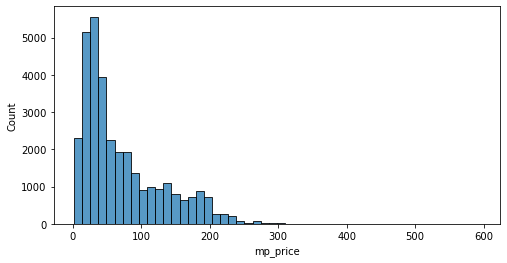

In [28]:
plt.figure(figsize=(8, 4))
sns.histplot(data=ph_df, x='mp_price', bins=50)

It can be seen in the histogram, the distribution is positively-skewed

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Beans'),
  Text(1, 0, 'Cabbage'),
  Text(2, 0, 'Carrots'),
  Text(3, 0, 'Eggs'),
  Text(4, 0, 'Fish'),
  Text(5, 0, 'Garlic'),
  Text(6, 0, 'Groundnuts'),
  Text(7, 0, 'Maize'),
  Text(8, 0, 'Maize flour'),
  Text(9, 0, 'Meat'),
  Text(10, 0, 'Onions'),
  Text(11, 0, 'Potatoes'),
  Text(12, 0, 'Rice'),
  Text(13, 0, 'Sweet potatoes'),
  Text(14, 0, 'Tomatoes')])

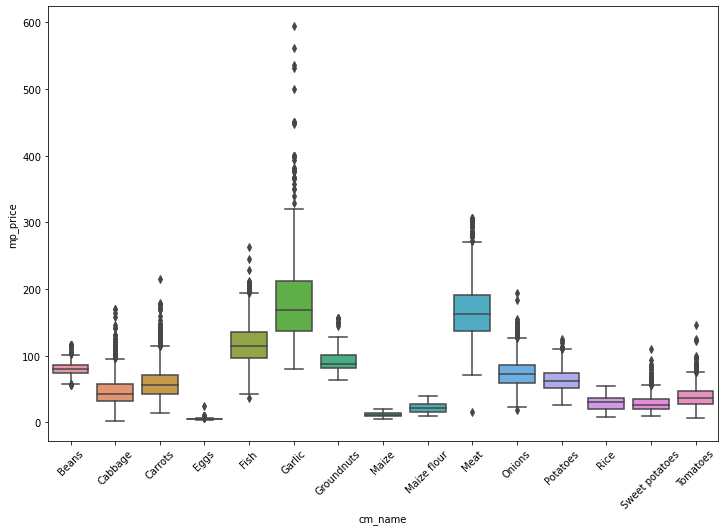

In [29]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=ph_df, x='cm_name', y='mp_price')
plt.xticks(rotation=45)

It can be seen in the boxplot the there are ...

## Research Question
Come up with research questions to answer using the dataset.The research questions should arise from the exploratory data analysis.
- The first research question should be answerable by performing statistical inference on means.
- The second research question should be answerable by performing statistical inference on categorical data.
- The research questions should be within the scope of the dataset.
- For each research question, you must indicate its importance and significance to the community.

Null Hypothesis: `The prices increased overtime`  
Alternative Hypothesis: `The prices is the same`

## 1.) Is there a significant difference between the food prices of rural and urban areas? 

Pricing is one of the most important factors people look at before buying food. This is much more important in areas where the average amount of money buyers have to budget for food is lower than more developed cities/areas. With this research question, we want to see which areas in the rural and urban areas have higher/lower prices in every type of food in the records available. To do this, we need to condense every city that is considered as a rural or an urban city and combine their means to represent the urban or rural side.

We will be binning these areas based on their city type. In order to group them together we researched the population density and the category of all the barangays of every area under the mkt_name field and checked if any source considered them to be urban or rural.


The following data for these cities will be classified as "Urban": Manila, Davao City, Cebu City, La Trinidad, Puerto Princesa, Santa Cruz, Tuguegarao, Legazpi, Iloilo City and Zamboanga City.

The following data for these cities will be under "Rural": Lingayen, Catarman, Shariff Aguak, Tubod, Koronadal, Palayan and Tandag.


## 2.) Is there a difference in prices on the same products with different characteristics?

Despite the availability of food almost everywhere, pricing is not the only factor consumers look at when buying commodities. For the case of rice, there exists multiple types of rice: black rice, red rice, white rice, brown rice, etc. and their preferences may vary. We formulated this research question to see which commodity differed in pricing based on their characteristics. 

To do this, we need to find which commodity posseses multiple characteristics, then we will separate these commodities to use for our hypothesis testing.

## Statistical Inference
In this section of the notebook, please take note of the following:
- If needed, you may perform preprocessing techniques to transform the data to the appropriate representation before performing statistical inference to answer the research question. This may include binning, log transformations, conversion to one-hot encoding, normalization, standardization, interpolation, truncation, and feature engineering. You may also need to check and prove if the data is from a normal distribution to perform some statistical inference techniques.
- The techniques used to answer the research questionare limited to statistical inference methods discussed in class. 
- The technique that you will apply should be appropriate to answer the research question.

## 1.) Is there a significant difference between the food prices of rural and urban areas? 

In [30]:
urban_cities = {'Manila', 'Davao City', 'Cebu City', 'La Trinidad', 'Puerto Princesa', 'Santa Cruz', 'Tuguegarao', 'Legazpi', 'Iloilo City', 'Zamboanga City'}
rural_cities = {'Lingayen', 'Catarman', 'Shariff Aguak', 'Tubod', 'Koronadal', 'Palayan', 'Tandag'}

urban_df = pd.DataFrame()
rural_df = pd.DataFrame()

for city in urban_cities:
    df_holder = ph_df[ph_df['mkt_name']==city]
    urban_df = urban_df.append(df_holder)

for city in rural_cities:
    df_holder = ph_df[ph_df['mkt_name']==city]
    rural_df = rural_df.append(df_holder)

urban_df_mean = urban_df.agg({"mp_price": ["mean", "std"]})
rural_df_mean = rural_df.agg ({"mp_price": ["mean", "std"]})

print(urban_df["cm_name"].unique().tolist() )
print(rural_df["cm_name"].unique().tolist() )
print (urban_df.size)
print(rural_df.size)
print(ph_df.size)

['Rice', 'Sweet potatoes', 'Eggs', 'Garlic', 'Onions', 'Tomatoes', 'Groundnuts', 'Meat', 'Potatoes', 'Carrots', 'Cabbage', 'Beans', 'Fish', 'Maize flour']
['Rice', 'Sweet potatoes', 'Eggs', 'Garlic', 'Onions', 'Tomatoes', 'Groundnuts', 'Meat', 'Potatoes', 'Carrots', 'Cabbage', 'Beans', 'Fish', 'Maize']
228239
136774
365013


Null Hypothesis: `There is no difference between the average prices in urban areas and the average prices in rural areas.`  
Alternative Hypothesis: `There is a difference between the average prices in urban areas and the average prices in rural areas.`

To find our results, we need to perform a two tailed T-test on the unpaired observations because the number of samples for food prices in urban cities and rural cities are not equal.

|   |Urban Cities   | Rural Cities  |  
|---|---|---|
|  Mean | 71.301756  | 71.388046  |  
| Standard Deviation  |  60.593852 | 58.888960  |   
|  Sample Size | 228239  | 136774  |  

Hypothesis Testing

$H_{0}$ : 𝜇 = 0

$H_{A}$ : 𝜇 ≠ 0

$$T-score = \frac{(71.388-71.302)-0}{\sqrt{\frac{(60.594)^{2}}{228239}+\frac{(58.889)^{2}}{136774}}}$$

$$T-score = 0.422$$

After computing for the p-value using the t-score of 0.422 and degrees of freedom at 365011, we calculated that the p value is 0.673025.

This means that the p-value is not significant at all significance levels (0.01, 0.05, 0.1) which entails that we fail to reject the null hypothesis at all significance levels. Our conlucion for this T-test is that there is in fact no difference between the price in Urban cities and Rural cities.

## 2.) Is there a difference in prices on the same products with different characteristics?

In [36]:
food_df = ph_df["cm_name"].unique().tolist()

df_holder = []

for food in food_df:
    if (food == "rice" | food == "meat"):
        
    else: 

        if(len(ph_df.loc[ph_df["cm_name"]==food]["characteristics"].unique().tolist()) > 1):
            record_mean = ph_df[ph_df["cm_name"]==food].groupby("characteristics").agg({"mp_price": ["mean", "std"]})
            df_holder.append(record_mean)

print (df_holder)
        

[                   mp_price          
                       mean       std
characteristics                      
milled, superior  30.640090  9.437837
paddy             14.577440  2.026922
regular, milled   29.979414  8.338641,                   mp_price           
                      mean        std
characteristics                      
red              77.812066  21.241765
white            70.157368  19.446176,                           mp_price           
                              mean        std
characteristics                              
beef, chops with bones  192.675642  33.617726
chicken, whole          136.816282  14.018666
pork                    167.366943  39.801057,                   mp_price          
                      mean       std
characteristics                     
white            22.565042  7.050490
yellow           20.928437  6.295231,                   mp_price          
                      mean       std
characteristics                     
white

## Insights and Conclusions
Clearly  state  your  insights  and  conclusions  from  the  data  to  answer  each  research question you have defined. Make sure that all conclusions are backed up with statistical evidence.

Sources:

1.) https://puertoprincesa.ph/?q=about-our-city/location-and-land-area

2.) http://latrinidad.gov.ph/wp-content/uploads/2015/09/La-Trinidad-Socio-Economic-Profile-2015.pdf

3.) https://www.philatlas.com/luzon/mimaropa/puerto-princesa.html
